In [1]:
import numpy as np
import pandas as pd
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()

In [3]:
stopwords = set(stopwords.words('english'))
stopwords = stopwords = stopwords.union({'men','women','paperback','blue','black','brown','purple','burgundy','gold','silver'})

In [4]:
df = pd.read_csv('training.txt', sep = '\t')
df.reset_index(level=0, inplace=True)
df.columns = ['text','labels']
df.head()

,text,labels
0,Calvin Klein IN2U Eau de Toilette - 150 ml (...,calvin klein
1,For The Love of Physics (Paperback),physics
2,Nike Fission Deodorant Spray - 200 ml (For Men),nike-deodrant
3,Spoken English (With CD) 2nd Edition (Paperback),spoken english
4,The C++ Programming Language 3 Edition (Paperb...,c programming


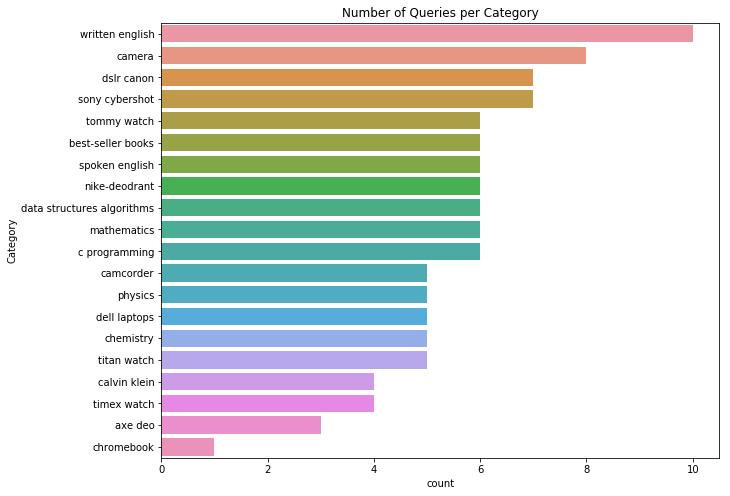

In [5]:
plt.figure(figsize=(10, 8))
sns.countplot(y='labels',data= df,order=df['labels'].value_counts().index)
plt.title('Number of Queries per Category')
plt.ylabel('Category')
plt.show()

In [6]:
def text_process(mess):
    mess = mess.lower()
    tokens = re.sub('[^a-zA-Z]', ' ',mess)
    tokens = tokens.split()
    tokens = [t for t in tokens if len(t) > 2]
    tokens = [wl.lemmatize(t) for t in tokens]
    return [word for word in tokens if word not in stopwords]

In [7]:
sample = df.iloc[0,0]
sample

'Calvin Klein IN2U Eau de Toilette  -  150 ml (For Men)'

In [8]:
text_process(sample)

['calvin', 'klein', 'eau', 'toilette']

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [10]:
pipeline = Pipeline([
    ('bow_text', CountVectorizer(analyzer=text_process)),  
    ('tfidf_text', TfidfTransformer()),
    ('model', LogisticRegression()),
])

In [11]:
pipeline.fit(df['text'],df['labels'])

C:\Users\rebelpc\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Pipeline(memory=None,
     steps=[('bow_text', CountVectorizer(analyzer=<function text_process at 0x000001C919678A60>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), prepro...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

TESTING

In [13]:
Xtest_df = pd.read_csv('sample_input.txt',sep='\n')
Xtest_df.columns=['data']
Xtest_df.head()

,data
0,Data Structures and Algorithms with Object- Or...
1,"God Moments: Stories That Inspire, Moments to ..."
2,"The Ultimate C: Concepts, Programs and Intervi..."
3,"Canon EOS 1100D SLR (Black, with Kit (EF S18-5..."
4,A Textbook of Organic Chemistry for JEE Main &...


In [14]:
Ytest_df = pd.read_csv('sample_output.txt',sep='\n',header=None)
Ytest_df.columns=['label']
Ytest_df.head()

,label
0,data structures algorithms
1,written english
2,c programming
3,dslr canon
4,chemistry


In [15]:
y_pred = pipeline.predict(Xtest_df['data'])

C:\Users\rebelpc\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [16]:
from sklearn.metrics import classification_report
print (classification_report(Ytest_df['label'], y_pred))

                            precision    recall  f1-score   support

                   axe deo       1.00      0.60      0.75         5
         best-seller books       1.00      0.50      0.67         2
             c programming       0.60      0.50      0.55         6
              calvin klein       1.00      1.00      1.00         5
                 camcorder       1.00      1.00      1.00         2
                    camera       0.25      1.00      0.40         1
                 chemistry       1.00      0.57      0.73         7
                chromebook       0.00      0.00      0.00         1
data structures algorithms       0.50      1.00      0.67         1
              dell laptops       0.67      0.67      0.67         3
                dslr canon       1.00      1.00      1.00         2
               mathematics       0.83      1.00      0.91         5
             nike-deodrant       1.00      1.00      1.00         1
                   physics       0.60      0.60

C:\Users\rebelpc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest_df['label'], y_pred)
print (cm)

[[3 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 3 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 1 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]]


In [26]:
acc = 47/60
print("Accuracy = ",acc)

Accuracy =  0.7833333333333333


In [49]:
N = int(input("Please enter the number of lines (1 - 200) : "))

if (N >= 1) and (N <= 200):
    lines = []
    category = []
    print("Enter the Lines : ")
    for i in range(N):
        print("Line {0} :" .format(i+1)),
        str = input()
        if (len(str) <=200):
            lines.append(str)
            category.append(pipeline.predict([lines[i]]))
         
    print("\n\n")      
    if (len(lines) != 0):
        print("Categories")
        for i in range(N):
            print(category[i])
            
    else:
        print("Maximum 200 characters allowed.Try Again!!!")
        
else:
    print("Number out of Range.Try Again!!!")
    

Please enter the number of lines (1 - 200) : 5
Enter the Lines : 
Line 1 :
Sony DCR-SX22E Camcorder (Black)


C:\Users\rebelpc\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Line 2 :
Sony Cybershot DSC-S5000 Point & Shoot (Silver)
Line 3 :
Calvin Klein Euphoria Eau de Toilette  -  100 ml (For Men)
Line 4 :
Spoken English: A Manual of Speech and Phonetics (With CD) 4 Edition (Paperback)
Line 5 :
Spoken English (With CD) (Paperback)



Categories
['camcorder']
['sony cybershot']
['calvin klein']
['spoken english']
['spoken english']
